# Text preprocessing


Cleaning text is an essential step in any NLP procedure, and it can significantly impact the accuracy and performance of machine learning models. Text data usually contains noise, such as punctuation, stopwords, and other information that is often filtered out before creating an input for the model. The level of text preparation at this stage may vary according to the modelling technique used and the type of analysis. In general, a good cleaning procedure can improve the efficiency and effectiveness of NLP models and speed up the training process.

The process of separating out a sequence of text into units is called tokenization. Sentences, words, syllables or even letters are possible solutions, depending on the technique. The tokenization method implemented is one the most common ones where words are treated as tokens and are separated by spaces. Characters that are not a word character or whitespace characters, such as punctuation marks or special characters were removed. These correspond to the regular expression pattern [^\w\s].

Length of words has been considered as well and therefore words shorter than 3 characters were removed.

Words that occur frequently in a language but do not carry much meaning are called stopwords in the context of NLP. These are usually filtered out from NLP tasks, because they are considered noise in text analysis.

Examples of stopwords in English include words such as "the", “and”, "a", "an", "in", "on", "at", "of", "to", "for", "with", "is", "are", "am", "was", "were", "be", "been", "being". A list of English stopwords made available by the popular package NLTK was used as a filter.

The reduction of words to their base or root form can help to simplify the text and reduce the size of the vocabulary. A common technique for this is called stemming. This practice consists of removing the end part of each word by applying some fixed rules. For example, the word adjustable is reduced to its base form adjust, while the word airline is modified to airlin and chasing results in the root word chas.

This helps to standardise the text, but clearly, as in the examples just shown, the resulting base form is not always a linguistically correct word. Nevertheless, it is an effective technique and in fact it is commonly adopted in search engines to retrieve relevant documents and in text classification pipelines to reduce the feature space before training a machine learning model.


A slightly more sophisticated root extraction method is called lemmatisation, which is a technique that is used to reduce a word to its dictionary form (lemma). Unlike stemming, lemmatisation will always produce a meaningful word belonging to the language in which it is adopted. For example, all conjugated forms of the verb run, like ran, running are converted to run. Lexical databases, like WordNet provide open access lookup tools to lemmatise a sequence of text.
Usually only one root extraction technique is applied to a text to use for NLP tasks. For this project, lemmatisation was preferred as it was perceived more capable of condensation. The Spacy Lemmatizer component was utilised for this purpose.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import nltk
import pandas as pd
import re
import spacy
import swifter
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nltk.download('stopwords')
spacy.cli.download("en_core_web_lg")

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stemmer = nltk.stem.SnowballStemmer('english')
nlp = spacy.load("en_core_web_lg") # for lemmatisation

The prefixes “http" and "https” and the top-level domain suffix were removed from URLs. All other level domains have been left, as in same cases these could provide names of organisations or websites that could help to identify a topic.

In [ ]:
!wget https://data.iana.org/TLD/tlds-alpha-by-domain.txt

In [6]:
### Top Level Domain list
### source https://data.iana.org/TLD/tlds-alpha-by-domain.txt
### used to clean up URLs
tld_set = set()
with open("tlds-alpha-by-domain.txt") as f:
    for l in f.readlines():
        tld_set.add(l.replace("\n",""))

In [13]:
## a portion of the tld_set values

print(list(tld_set)[50:90])

['.nec', '.toshiba', '.bank', '.sanofi', '.open', '.xn--fiqs8s', '.io', '.cl', '.xn--mgbaakc7dvf', '.prof', '.juniper', '.mv', '.house', '.stada', '.prod', '.now', '.origins', '.locker', '.alibaba', '.gallery', '.gd', '.xn--6frz82g', '.clinic', '.golf', '.mn', '.xn--kpry57d', '.nz', '.ollo', '.pwc', '.xxx', '.aco', '.contact', '.fast', '.nra', '.cash', '.market', '.cafe', '.hangout', '.aaa', '.sc']


In [14]:
def preprocess(text, min_len=0, root_extraction=None, stop_words=None):
    '''
    Prepare a string of text for analysis into words. 
    parameter
        :param text: string - text to process
        :param min_len: int - minimum lenght of word to keep
        :root_extraction: string - None (default), 'stem','lemmatise'. choice of root/base extraction method. 
        :param stop_words: list - list of stopwords to remove
    return
        processed string of text
    '''
    
    text = text.lower()
    
    for x in tld_set:
        if x in text: text = text.replace(x, "")
        
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [x for x in tokens if not x.isnumeric()]

    if min_len > 0:
        tokens = filter(lambda x: len(x)>=min_len, tokens)    

    if stop_words != None:
        tokens = filter(lambda x: x not in stop_words, tokens)

    if root_extraction == 'stem':
        tokens = map(lambda x: stemmer.stem(x), tokens)
        
    if root_extraction == 'lemmatise':
        doc = nlp(' '.join(tokens))
        tokens = map(lambda x: x.lemma_, doc)

    return tokens

In [15]:
stop_words = set(nltk.corpus.stopwords.words("english"))
stop_words.update({'http', 'https'})

In [16]:
FILE = "../data/data.parquet.gzip"
data = pd.read_parquet(FILE)

In [17]:
data["processed_docs"] = data["text"]\
        .swifter.apply(lambda x: ' '.join(preprocess(x,
                                    min_len=3,
                                    root_extraction='lemmatise',
                                    stop_words=stop_words)))

In [16]:
data[["text","processed_docs"]].head()

,text,processed_docs
0,Calculation of prompt diphoton production cros...,calculation prompt diphoton production cross s...
1,Sparsity-certifying Graph Decompositions We ...,sparsitycertifye graph decomposition describe ...
2,The evolution of the Earth-Moon system based o...,evolution earthmoon system base dark matter fi...
3,A determinant of Stirling cycle numbers counts...,determinant stirling cycle number count unlabe...
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,dyadic lambda_alpha lambda_alpha paper show co...


In [41]:
example = data.sample(1)
example["text"].iloc[0]

'Modular decomposition numbers of cyclotomic Hecke and diagrammatic\n  Cherednik algebras: A path theoretic approach   We introduce a path-theoretic framework for understanding the representation\ntheory of (quantum) symmetric and general linear groups and their higher level\ngeneralisations over fields of arbitrary characteristic. Our first main result\nis a "super-strong linkage principle" which provides degree-wise upper bounds\nfor graded decomposition numbers (this is new even in the case of symmetric\ngroups). Next, we generalise the notion of homomorphisms between Weyl/Specht\nmodules which are "generically" placed (within the associated alcove\ngeometries) to cyclotomic Hecke and diagrammatic Cherednik algebras. Finally,\nwe provide evidence for a higher-level analogue of the classical Lusztig\nconjecture over fields of sufficiently large characteristic.\n'

In [42]:
example

,id,target_name_extended,text,target_extended,processed_docs,target,target_name
861863,1706.07128,Mathematics,Modular decomposition numbers of cyclotomic He...,7,modular decomposition number cyclotomic hecke ...,1,Mathematics


In [43]:
example["processed_docs"].iloc[0]

'modular decomposition number cyclotomic hecke diagrammatic cherednik algebras path theoretic approach introduce paththeoretic framework understand representation theory quantum symmetric general linear group high level generalisation field arbitrary characteristic first main result superstrong linkage principle provide degreewise upper bound grade decomposition number new even case symmetric group next generalise notion homomorphism weylspecht module generically place within associate alcove geometry cyclotomic hecke diagrammatic cherednik algebra finally provide evidence higherlevel analogue classical lusztig conjecture field sufficiently large characteristic'

### Saving before conducting further analysis

In [6]:
data.to_parquet("../data/data.parquet.gzip")

## Processed Word count analysis

In [44]:
def plot_counts(col, title):
    plt.figure(figsize= (8, 8))

    sns.displot(data[col])

    max_cnt = data[col].max()

    plt.xlim(0, max_cnt+10)

    plt.xlabel('Num of words ', fontsize = 16)
    plt.title(title, fontsize = 18)
    plt.show()

In [45]:
data['count_processed'] = data['processed_docs'].apply(lambda x: len(x.split()))

<Figure size 800x800 with 0 Axes>

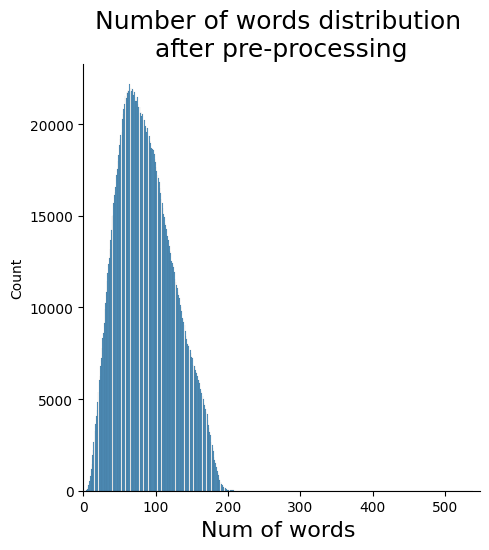

In [46]:
plot_counts('count_processed', "Number of words distribution \nafter pre-processing")

In [48]:
data['count_processed'].describe().apply(round)

count    2190407
mean          87
std           39
min            3
25%           58
50%           83
75%          114
max          538
Name: count_processed, dtype: int64

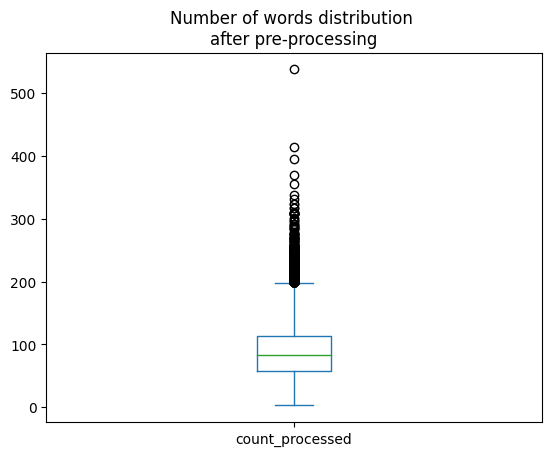

In [51]:
ax = data['count_processed'].plot(kind='box', title="Number of words distribution \nafter pre-processing")